# Week 4 Assignment Census Data
## Transportation profile Los Angeles
### Commuting times by neighborhoods 


### The following assignment looks to examine, visualize and represent the data collected from the percentages of workers that commute
longer than 1 hour to their workplace around different neighborhoods in the LA County. This data is a first step to provide results from the places and amount of people that spend significant time getting to their workplace, understanding the complexity and future problems this situation brings to the wellbeing of citizens and their quality of life


### Jose Portales

In [5]:
# First, provide workstation. import pandas to provide library for data exploration
# provide entrance for downloaded data

In [35]:
import pandas as pd
import geopandas as gpd
neighborhoods=gpd.read_file('incneigh.geojson')

In [7]:
#First we want to upload the csv files and filter the needed data
# The first csv is from the neighborhoods in LA County. The only file founded for this specifial spatial unit was one from the  Incarceration Impact by neighborhood. It was then renamed and uploaded

In [8]:
#Check the size of the data
neighborhoods.shape

(244, 20)

In [9]:
#Check a small sample of the columns and rows
neighborhoods.head()

,OBJECTID,Neighborhood,LAPD_Cost,LAPD_Days_in_Jail,LAPD_Arrests,LASD_Cost,LASD_Days_in_Jail,LASD_Arrests,F2010_Population,Combo_Cost,Combo_Cost_PerPop,Combo_Days,Combo_Days_PerPop,Combo_Arrests,Combo_Arrests_PerPop,spa,sup_dist,SHAPE_Length,SHAPE_Area,geometry
0,1,Acton,25282,110,51,1103120,7367,396,6128,1128402,184.138708,7477,1.220137,447,0.072944,SPA 1 - Antelope Valley,District 5,0.554615,0.010002,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,..."
1,2,Agoura Hills,83892,365,216,587038,3288,470,17147,670930,39.128127,3653,0.213040,686,0.040007,SPA 2 - San Fernando,District 3,0.255669,0.002063,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,..."
2,3,Agua Dulce,10573,46,23,377880,2513,140,21499,388453,18.068422,2559,0.119029,163,0.007582,SPA 1 - Antelope Valley,District 5,0.439983,0.008000,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,..."
3,4,Alhambra,301550,1312,647,2444920,16637,751,3535,2746470,776.936351,17949,5.077511,1398,0.395474,SPA 3 - San Gabriel,District 1,0.210733,0.001929,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,..."
4,5,Alondra Park,55621,242,112,667093,4244,326,83089,722714,8.698071,4486,0.053990,438,0.005271,SPA 8 - South Bay,District 2,0.078123,0.000288,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,..."


<Axes: >

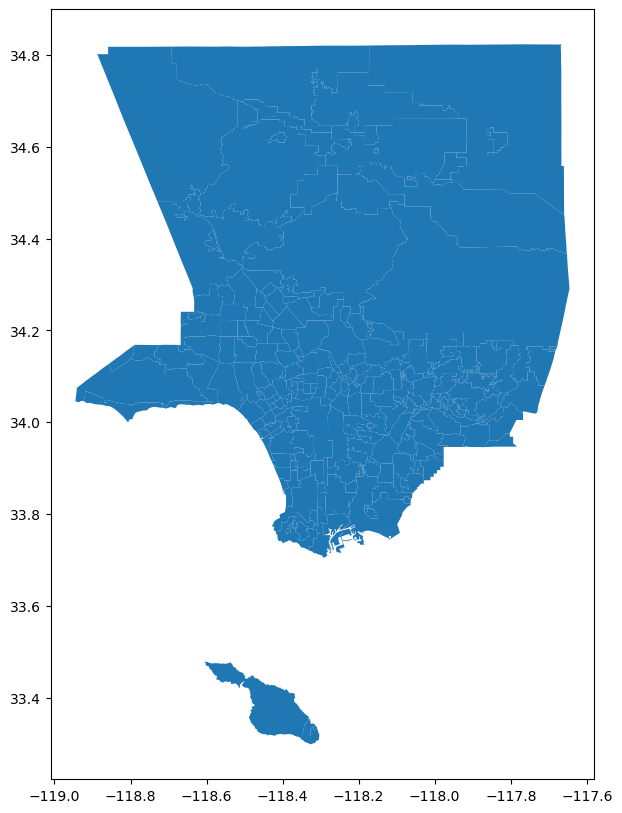

In [10]:
#Plot the file to undestrand the size of the "geometry" of the geojsn file
neighborhoods.plot(figsize=(12,10))

In [11]:
#shorten the data and generate a new dataframe with the deisred information.We only need specific variables and info

columns_to_keep = ['OBJECTID',
                   'spa',
                   'Neighborhood',
                   'sup_dist',
                  'geometry']

In [12]:
neighborhoods2 = neighborhoods[columns_to_keep]

In [13]:
#Check the size of the new, trimmed variable
neighborhoods2.shape

(244, 5)

In [14]:
#Create another variable trimming another information, this time 2 rows that contain information about the unwanted neighborhoods(islands below)

neighborhoods3 = neighborhoods2.drop([11, 207])

In [15]:
#Check the new variable
neighborhoods3.shape

(242, 5)

<Axes: >

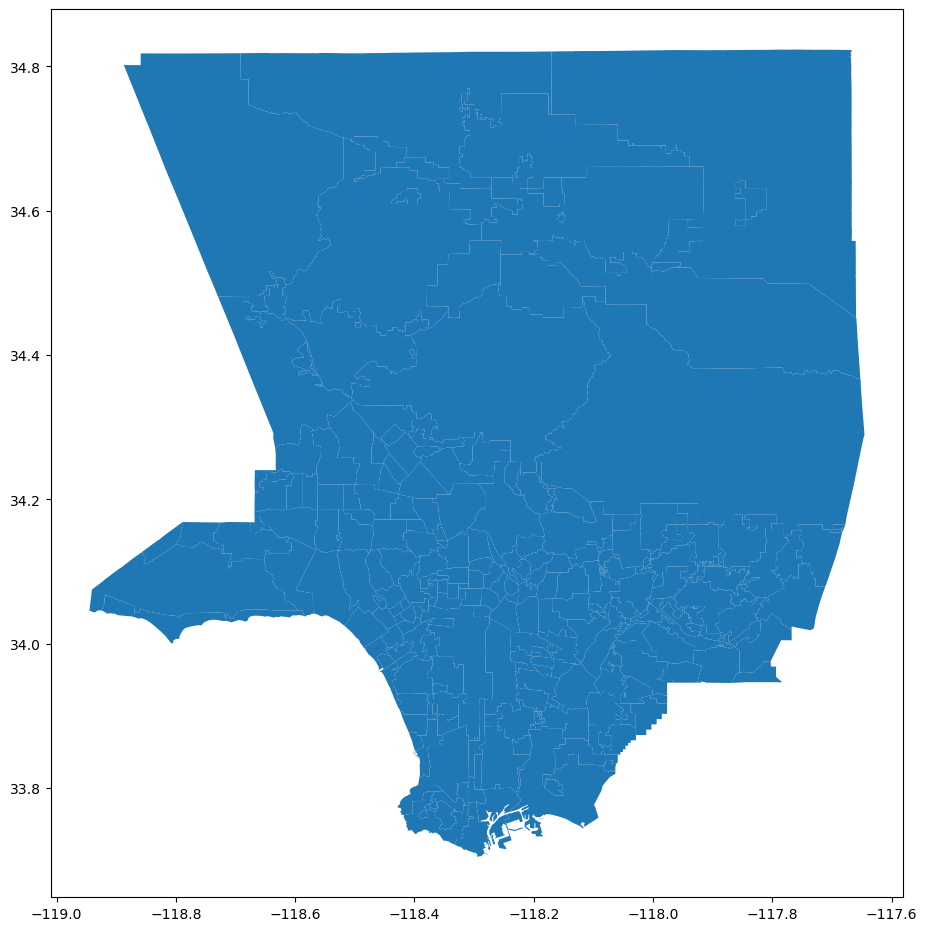

In [16]:
#Plot the new varaible with the unwanted land. Now LA Cojnty has been mapped
neighborhoods3.plot(figsize=(11,12))

In [17]:
#Import csv file with the % of commute time above 1 hour by neighborhood in LA County
commute=pd.read_csv('CTLC3.csv', delimiter=';')
commute.head()

,name,year,denom_tot_workers,Commute Time Above 1 Hour
0,Irwindale,2021,"804,94",15.25
1,Pico-Union,2021,"18793,13",16.64
2,Glendora,2021,"25208,2",17.26
3,Industry,2021,"6066,56",16.16
4,Sylmar,2021,"36939,14",11.57


In [18]:
#For the upcoming merge, we want to change the name of the variable "neighborhood" to allow the merge to work
commute.rename(columns={'name': 'Neighborhood'}, inplace=True)
commute.head()

,Neighborhood,year,denom_tot_workers,Commute Time Above 1 Hour
0,Irwindale,2021,"804,94",15.25
1,Pico-Union,2021,"18793,13",16.64
2,Glendora,2021,"25208,2",17.26
3,Industry,2021,"6066,56",16.16
4,Sylmar,2021,"36939,14",11.57


In [19]:
#Check bot databases have the same name of columnn
neighborhoods3.head()

,OBJECTID,spa,Neighborhood,sup_dist,geometry
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,..."
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,..."
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,..."
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,..."
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,..."


In [20]:
#merge based on common element

merged_df = neighborhoods3.merge(commute,on='Neighborhood')



In [21]:
#Check the merge was succesfull
merged_df.head()

,OBJECTID,spa,Neighborhood,sup_dist,geometry,year,denom_tot_workers,Commute Time Above 1 Hour
0,1,SPA 1 - Antelope Valley,Acton,District 5,"MULTIPOLYGON Z (((-118.20262 34.53899 0.00000,...",2021,"1448,51",42.38
1,2,SPA 2 - San Fernando,Agoura Hills,District 3,"MULTIPOLYGON Z (((-118.76193 34.16820 0.00000,...",2021,"8032,5",15.27
2,3,SPA 1 - Antelope Valley,Agua Dulce,District 5,"MULTIPOLYGON Z (((-118.25468 34.55830 0.00000,...",2021,"2073,33",21.80
3,4,SPA 3 - San Gabriel,Alhambra,District 1,"MULTIPOLYGON Z (((-118.12175 34.10504 0.00000,...",2021,"40794,02",11.12
4,5,SPA 8 - South Bay,Alondra Park,District 2,"MULTIPOLYGON Z (((-118.32651 33.89757 0.00000,...",2021,"3869,87",16.85


In [22]:
#Check info
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   225 non-null    int64   
 1   spa                        225 non-null    object  
 2   Neighborhood               225 non-null    object  
 3   sup_dist                   225 non-null    object  
 4   geometry                   225 non-null    geometry
 5   year                       225 non-null    int64   
 6   denom_tot_workers          224 non-null    object  
 7   Commute Time Above 1 Hour  224 non-null    float64 
dtypes: float64(1), geometry(1), int64(2), object(4)
memory usage: 14.2+ KB


In [23]:
merged_df.shape


(225, 8)

<Axes: >

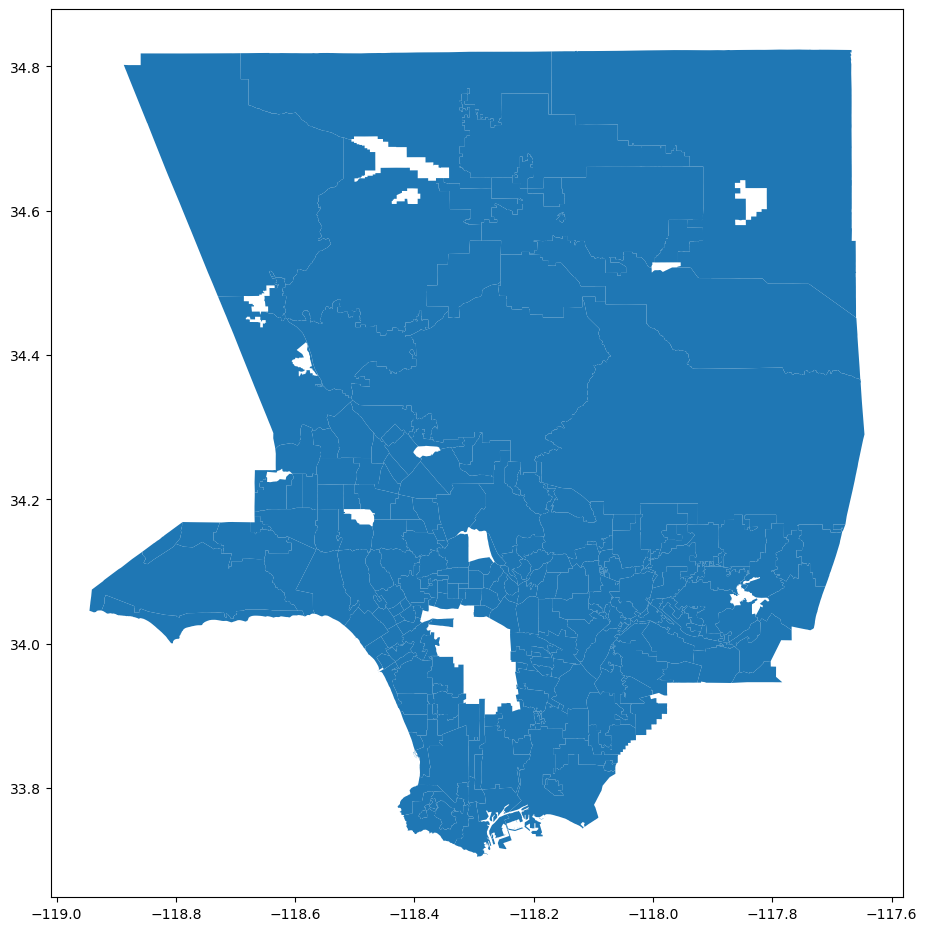

In [24]:
#Plot the merged database. Blank gaps in the map tells us the mssing neighborhoods in the previous databases
merged_df.plot(figsize=(11,12))

### Up to this point, data has been selected to have the information of neighborhoods, and how much percentage of their working population
### comute more than 1 hour. We want to dive into the differences between the neighborhoods with the lower and higher percentage

In [25]:
#A chart that shows the neighborhoods with higher percentages
info_statistics=merged_df.sort_values(by='Commute Time Above 1 Hour',ascending = False)

In [26]:
info_statistics[['Neighborhood','Commute Time Above 1 Hour']].head(10)

,Neighborhood,Commute Time Above 1 Hour
0,Acton,42.38
174,Southeast Antelope Valley,34.66
6,Angeles Crest,33.24
192,Tujunga Canyons,32.67
134,Palmdale,31.54
184,Sun Village,30.46
220,Whittier Narrows,29.97
123,Northeast Antelope Valley,28.64
48,Desert View Highlands,24.83
31,Castaic Canyons,22.78


<Axes: xlabel='Neighborhood'>

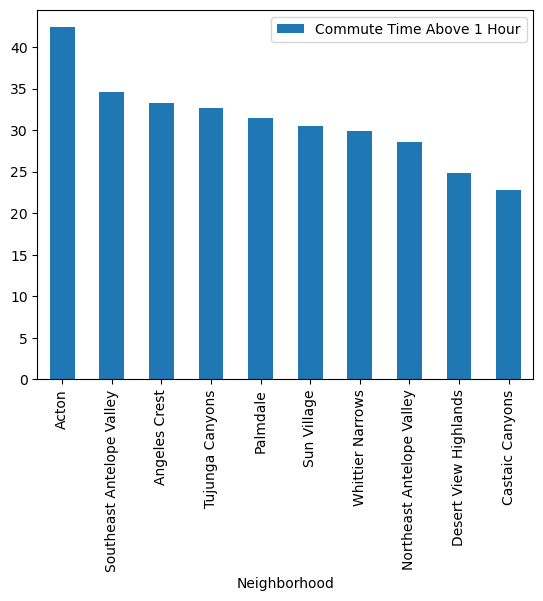

In [27]:
info_statistics.head(10).plot.bar(x='Neighborhood',
                            y='Commute Time Above 1 Hour')

<Axes: title={'center': 'Top 10 neighborhoods with the highest percentage of commute to work over 1 hour'}, ylabel='Neighborhood'>

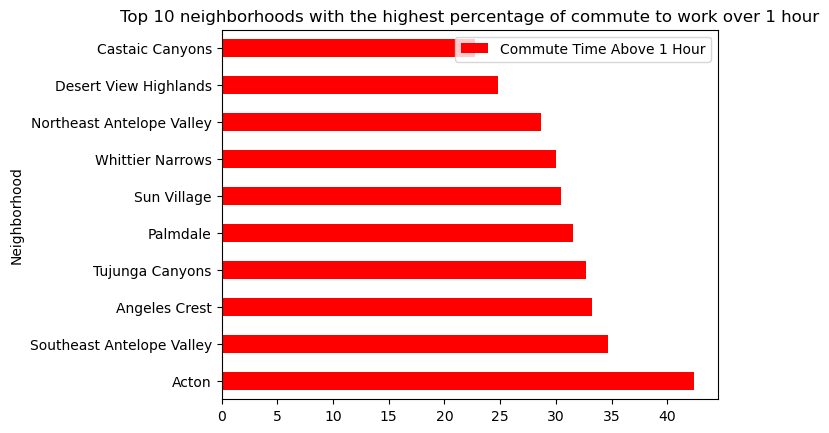

In [28]:

info_statistics.head(10).plot.barh(x='Neighborhood',
                            y='Commute Time Above 1 Hour', 
                            title='Top 10 neighborhoods with the highest percentage of commute to work over 1 hour',
                            color='red')

In [29]:
# Now we want to know the same, but for the neighborhoods that have the lowest percentages of workers ta commute to work over 1 hour


In [30]:
#A chart that shows the neighborhoods with higher percentages
info_statistics2=merged_df.sort_values(by='Commute Time Above 1 Hour',ascending = True)

In [31]:
info_statistics2[['Neighborhood','Commute Time Above 1 Hour']].head(10)

,Neighborhood,Commute Time Above 1 Hour
111,Marina del Rey,0.00
215,West Los Angeles,2.54
21,Beverlywood,3.65
218,Westwood,4.01
73,Hancock Park,4.08
32,Century City,4.57
141,Pico-Robertson,4.66
90,Ladera Heights,4.90
36,Cheviot Hills,4.92
135,Palms,5.39


<Axes: title={'center': 'Top 10 neighborhoods with the lowest percentage of commute to work over 1 hour'}, ylabel='Neighborhood'>

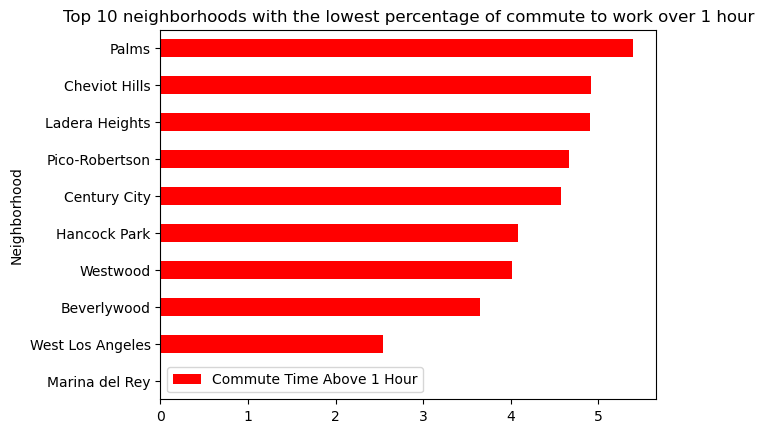

In [32]:
info_statistics2.head(10).plot.barh(x='Neighborhood',
                            y='Commute Time Above 1 Hour', 
                            title='Top 10 neighborhoods with the lowest percentage of commute to work over 1 hour',
                            color='red')

In [ ]:
#The function of matplotlib has been added to provide a space where the two graphs are shown eachother and opposed


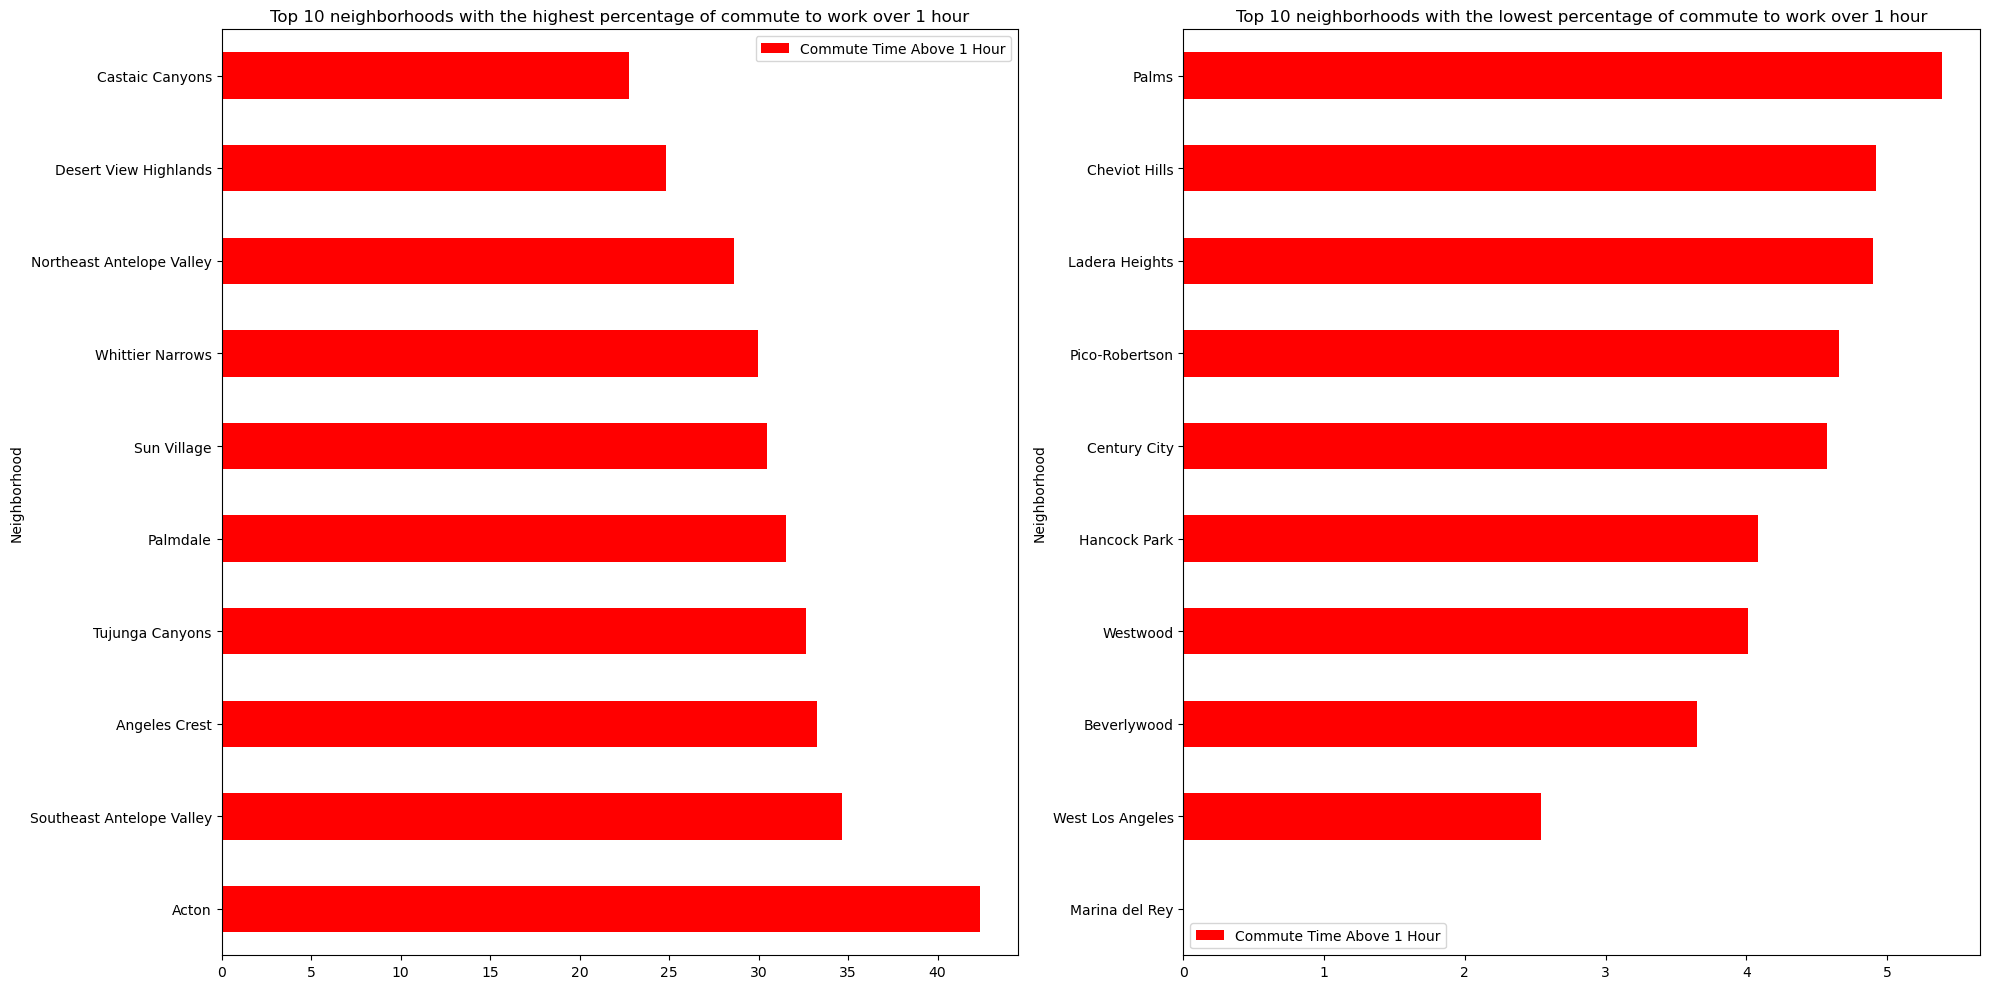

In [33]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure and axes, specifying the figure size and the layout
fig, axs = plt.subplots(1, 2, figsize=(20, 10)) # 1 row, 2 columns

# Plot the first graph on the first subplot
info_statistics.head(10).plot.barh(x='Neighborhood',
                                   y='Commute Time Above 1 Hour', 
                                   title='Top 10 neighborhoods with the highest percentage of commute to work over 1 hour',
                                   color='red', ax=axs[0])

# Plot the second graph on the second subplot
info_statistics2.head(10).plot.barh(x='Neighborhood',
                                    y='Commute Time Above 1 Hour', 
                                    title='Top 10 neighborhoods with the lowest percentage of commute to work over 1 hour',
                                    color='red', ax=axs[1])

# Automatically adjust subplot params to give specified padding
plt.tight_layout()

# Show the plot
plt.show()


#So that the contrasting provides valuable information, we set the min and max value for the x axis

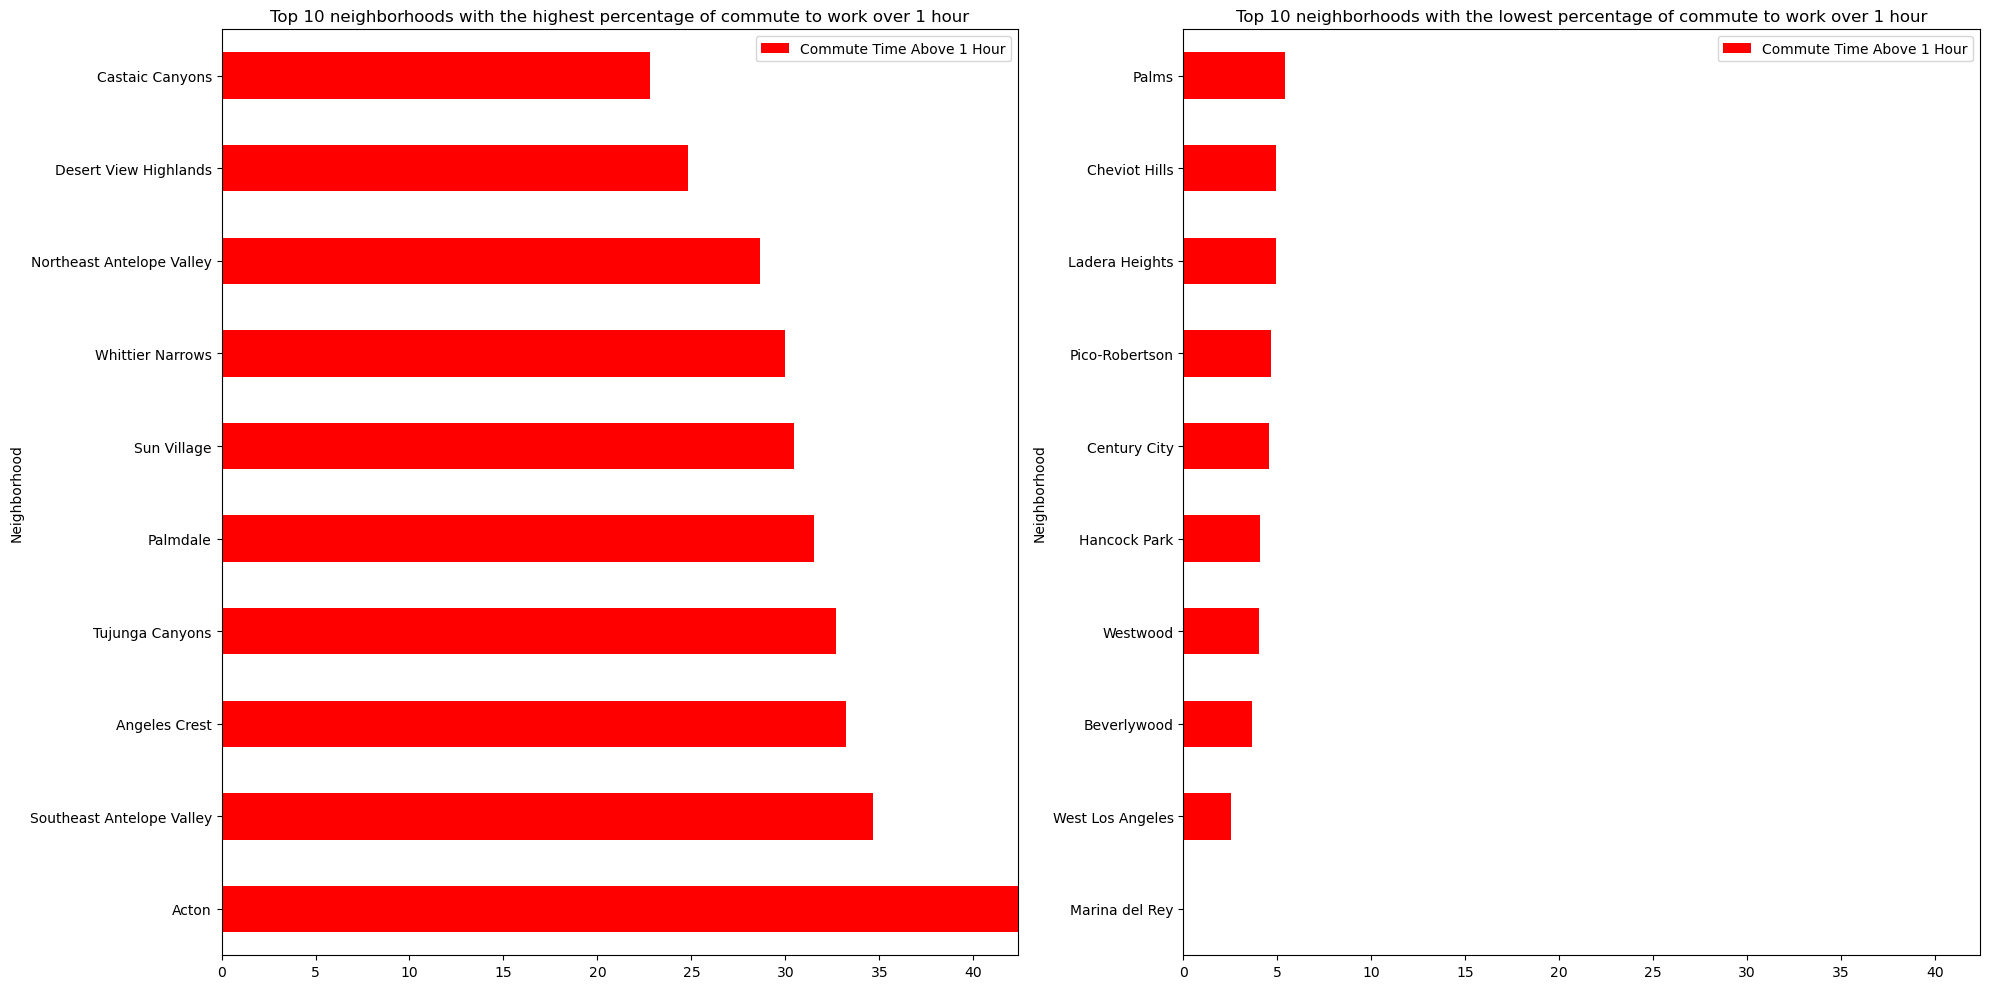

In [34]:
import matplotlib.pyplot as plt

# Determine the global minimum and maximum values for the x-axis
max_value = max(LA_Commute_top['Commute Time Above 1 Hour'].max(), LA_Commute_low['Commute Time Above 1 Hour'].max())
min_value = min(LA_Commute_top['Commute Time Above 1 Hour'].min(), LA_Commute_low['Commute Time Above 1 Hour'].min())

# Set up the matplotlib figure and axes, specifying the figure size and the layout
fig, axs = plt.subplots(1, 2, figsize=(20, 10)) # 1 row, 2 columns

# Plot the first graph on the first subplot
LA_Commute_top.head(10).plot.barh(x='Neighborhood',
                                   y='Commute Time Above 1 Hour', 
                                   title='Top 10 neighborhoods with the highest percentage of commute to work over 1 hour',
                                   color='red', ax=axs[0])
# Set the same x-axis limits for the first graph
axs[0].set_xlim([min_value, max_value])

# Plot the second graph on the second subplot
LA_Commute_low.head(10).plot.barh(x='Neighborhood',
                                    y='Commute Time Above 1 Hour', 
                                    title='Top 10 neighborhoods with the lowest percentage of commute to work over 1 hour',
                                    color='red', ax=axs[1])
# Set the same x-axis limits for the second graph
axs[1].set_xlim([min_value, max_value])

# Automatically adjust subplot params to give specified padding
plt.tight_layout()

# Show the plot
plt.show()
